In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from functools import reduce


In [4]:
shelter_data = pd.read_csv("Shelters by State -2009-18.csv")
population = pd.read_csv("Population by State -2009-18.csv")
homeless_pop = pd.read_csv("HUD Homeless Data.csv")
budget_data = pd.read_csv("HUD Budget - 2014-18.csv")

In [5]:
dfs1=[shelter_data,population,homeless_pop]
dfs=[shelter_data,population,homeless_pop, budget_data]
combined_HUD_df_BUD = reduce(lambda left,right: pd.merge(left,right,on=['State',"Year"]), dfs)
combined_HUD_df = reduce(lambda left,right: pd.merge(left,right,on=['State',"Year"]), dfs1)

#homeless_pop

In [7]:
combined_HUD_df_BUD.to_csv("Total HUD Data w Budget.csv", mode='a',index=False)
combined_HUD_df.to_csv("Total HUD Data.csv", mode='a',index=False)
combined_HUD_df.head()
combined_HUD_df.dtypes

State                                                       object
Total Beds                                                   int64
Participation                                              float64
Year                                                         int64
Population                                                 float64
Overall Homeless                                             int64
Sheltered Total Homeless                                     int64
Unsheltered Homeless                                         int64
Homeless Individuals                                         int64
Sheltered Total Homeless Individuals                         int64
Unsheltered Homeless Individuals                             int64
Homeless People in Families                                  int64
Sheltered Total Homeless People in Families                  int64
Unsheltered Homeless People in Families                      int64
Homeless Family Households                                   i

In [35]:
data_2018=combined_HUD_df['Year']==2018
HUD_data_2018 = combined_HUD_df[data_2018]

In [36]:
HUD_data_2018.dtypes

State                                                       object
Total Beds                                                   int64
Participation                                              float64
Year                                                         int64
Population                                                 float64
Overall Homeless                                             int64
Sheltered Total Homeless                                     int64
Unsheltered Homeless                                         int64
Homeless Individuals                                         int64
Sheltered Total Homeless Individuals                         int64
Unsheltered Homeless Individuals                             int64
Homeless People in Families                                  int64
Sheltered Total Homeless People in Families                  int64
Unsheltered Homeless People in Families                      int64
Homeless Family Households                                   i

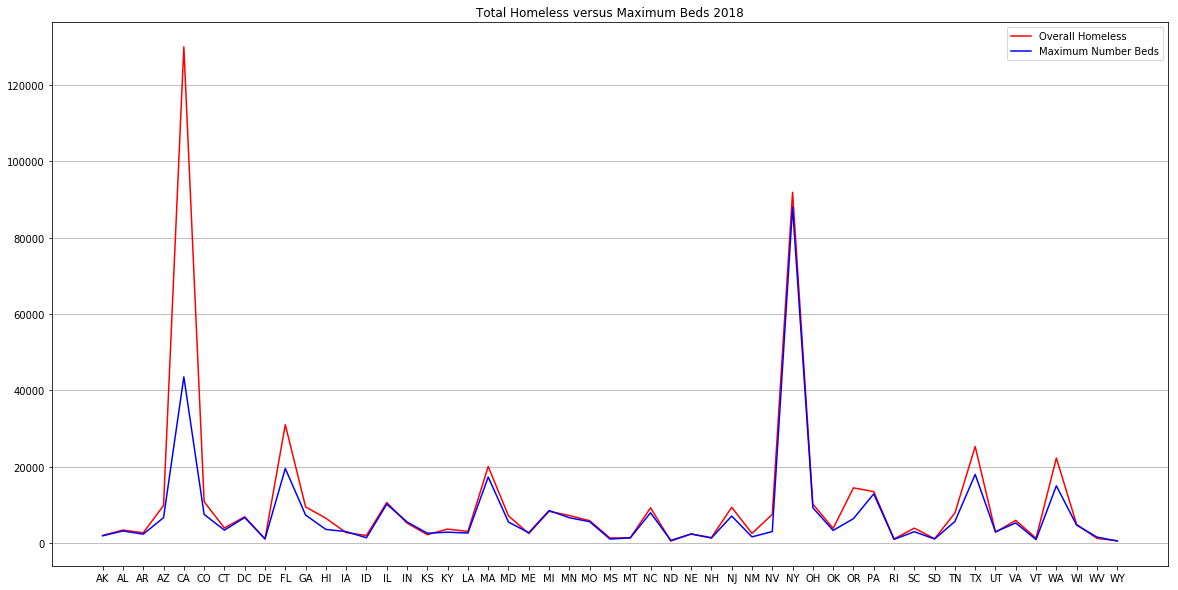

In [46]:
plt.plot(HUD_data_2018["State"],HUD_data_2018['Overall Homeless'], color='red', label='Overall Homeless'
    )
plt.plot(HUD_data_2018["State"],HUD_data_2018['Total Beds'], color='blue', label='Maximum Number Beds')
plt.rcParams['figure.figsize']=(20,10)
plt.legend(loc='best')
plt.title("Total Homeless versus Maximum Beds 2018")
plt.gca().yaxis.grid(True)
plt.savefig("hmls_pop_vs_beds.png")
plt.show()

In [38]:
bud_data_2018=combined_HUD_df_BUD['Year']==2018
HUD_data_2018_BUD = combined_HUD_df_BUD[bud_data_2018]
pd.options.display.float_format = '{:,.2}'.format

In [39]:
HUD_data_2018_BUD.head()

,State,Total Beds,Participation,Year,Population,Overall Homeless,Sheltered Total Homeless,Unsheltered Homeless,Homeless Individuals,Sheltered Total Homeless Individuals,...,Chronically Homeless Individuals,Sheltered Total Chronically Homeless Individuals,Unsheltered Chronically Homeless Individuals,Chronically Homeless People in Families,Sheltered Total Chronically Homeless People in Families,Unsheltered Chronically Homeless People in Families,Homeless Veterans,Sheltered Total Homeless Veterans,Unsheltered Homeless Veterans,Budget
204,AK,1940,0.73,2018,7.4e+05,2016,1707,309,1434,1173,...,323,243,80,34,32,2,132,110,22,3925329
205,AL,3188,0.51,2018,4.9e+06,3434,2424,1010,2570,1693,...,472,277,195,68,64,4,339,267,72,17024088
206,AR,2362,0.29,2018,3e+06,2712,1455,1257,2280,1081,...,453,153,300,13,0,13,251,150,101,4124744
207,AZ,6683,0.69,2018,7.2e+06,9865,5799,4066,7259,3354,...,1740,564,1176,34,25,9,893,540,353,40629348
208,CA,43548,0.65,2018,4e+07,129972,40429,89543,109008,23635,...,32668,4857,27811,1664,793,871,10836,3622,7214,415290908


In [40]:
HUD_data_2018_BUD["% Homeless Pop"]=HUD_data_2018_BUD['Overall Homeless'].div(HUD_data_2018_BUD['Population'])
HUD_data_2018_BUD["% Homeless Pop"]=HUD_data_2018_BUD["% Homeless Pop"]*100

C:\Users\dkga1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\dkga1\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [41]:
HUD_Top_Bottom_5=HUD_data_2018_BUD[HUD_data_2018_BUD['State'].isin(['IL','DC','MA','NC','NY','CA','FL','OR','TX',
                                                  'WA'])]
HUD_Top_Bottom_5.head()

,State,Total Beds,Participation,Year,Population,Overall Homeless,Sheltered Total Homeless,Unsheltered Homeless,Homeless Individuals,Sheltered Total Homeless Individuals,...,Sheltered Total Chronically Homeless Individuals,Unsheltered Chronically Homeless Individuals,Chronically Homeless People in Families,Sheltered Total Chronically Homeless People in Families,Unsheltered Chronically Homeless People in Families,Homeless Veterans,Sheltered Total Homeless Veterans,Unsheltered Homeless Veterans,Budget,% Homeless Pop
208,CA,43548,0.65,2018,4e+07,129972,40429,89543,109008,23635,...,4857,27811,1664,793,871,10836,3622,7214,415290908,0.33
211,DC,6721,0.89,2018,7e+05,6904,6304,600,3770,3170,...,1286,300,195,195,0,306,246,60,22720536,0.98
213,FL,19554,0.71,2018,2.1e+07,31030,17637,13393,21443,10686,...,1237,3306,759,211,548,2543,1582,961,85425367,0.15
218,IL,10210,0.79,2018,1.3e+07,10643,8701,1942,6752,4876,...,778,692,155,143,12,804,574,230,116089960,0.084
223,MA,17310,0.9,2018,6.9e+06,20068,19083,985,6811,5828,...,1054,319,749,749,0,985,934,51,78523594,0.29


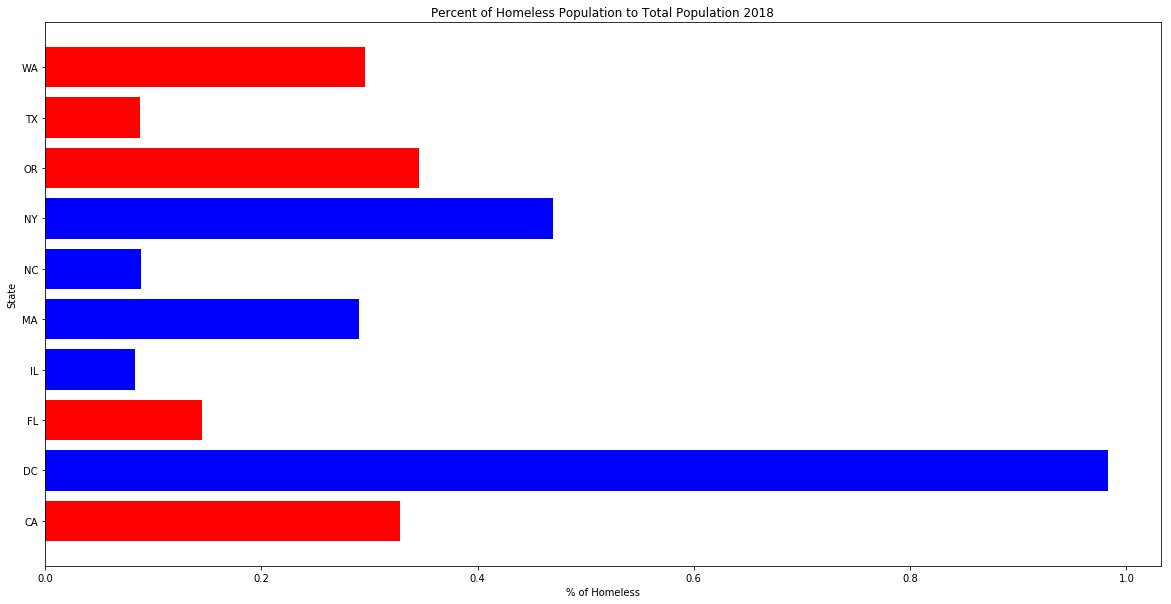

In [42]:
TB_States=HUD_Top_Bottom_5['State']
homeless_pop=HUD_Top_Bottom_5['% Homeless Pop']

plt.barh(TB_States, homeless_pop, color=['red', 'blue', 'red', 'blue','blue','blue','blue','red','red','red'])
plt.xlabel("% of Homeless")
plt.ylabel("State")
plt.title("Percent of Homeless Population to Total Population 2018")
plt.savefig("Homeless percent of pop.png")
plt.show()

In [43]:
#HUD_data_2018_BUD["$ per Capita"] = HUD_data_2018_BUD['BUDGET'].div(HUD_data_2018_BUD['Population'])
#plt.plot(HUD_Top_Bottom_5,bud_per_cap, color='red', label='Dollars Spent Per Capita')
HUD_Top_Bottom_5.dtypes

State                                                       object
Total Beds                                                   int64
Participation                                              float64
Year                                                         int64
Population                                                 float64
Overall Homeless                                             int64
Sheltered Total Homeless                                     int64
Unsheltered Homeless                                         int64
Homeless Individuals                                         int64
Sheltered Total Homeless Individuals                         int64
Unsheltered Homeless Individuals                             int64
Homeless People in Families                                  int64
Sheltered Total Homeless People in Families                  int64
Unsheltered Homeless People in Families                      int64
Homeless Family Households                                   i

In [44]:
HUD_Top_Bottom_5["Dollars per Capita"]=HUD_Top_Bottom_5['Budget'].div(HUD_Top_Bottom_5['Population'])
per_cap=HUD_Top_Bottom_5["Dollars per Capita"]
HUD_Top_Bottom_5.head()

C:\Users\dkga1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,State,Total Beds,Participation,Year,Population,Overall Homeless,Sheltered Total Homeless,Unsheltered Homeless,Homeless Individuals,Sheltered Total Homeless Individuals,...,Unsheltered Chronically Homeless Individuals,Chronically Homeless People in Families,Sheltered Total Chronically Homeless People in Families,Unsheltered Chronically Homeless People in Families,Homeless Veterans,Sheltered Total Homeless Veterans,Unsheltered Homeless Veterans,Budget,% Homeless Pop,Dollars per Capita
208,CA,43548,0.65,2018,4e+07,129972,40429,89543,109008,23635,...,27811,1664,793,871,10836,3622,7214,415290908,0.33,1e+01
211,DC,6721,0.89,2018,7e+05,6904,6304,600,3770,3170,...,300,195,195,0,306,246,60,22720536,0.98,3.2e+01
213,FL,19554,0.71,2018,2.1e+07,31030,17637,13393,21443,10686,...,3306,759,211,548,2543,1582,961,85425367,0.15,4.0
218,IL,10210,0.79,2018,1.3e+07,10643,8701,1942,6752,4876,...,692,155,143,12,804,574,230,116089960,0.084,9.1
223,MA,17310,0.9,2018,6.9e+06,20068,19083,985,6811,5828,...,319,749,749,0,985,934,51,78523594,0.29,1.1e+01


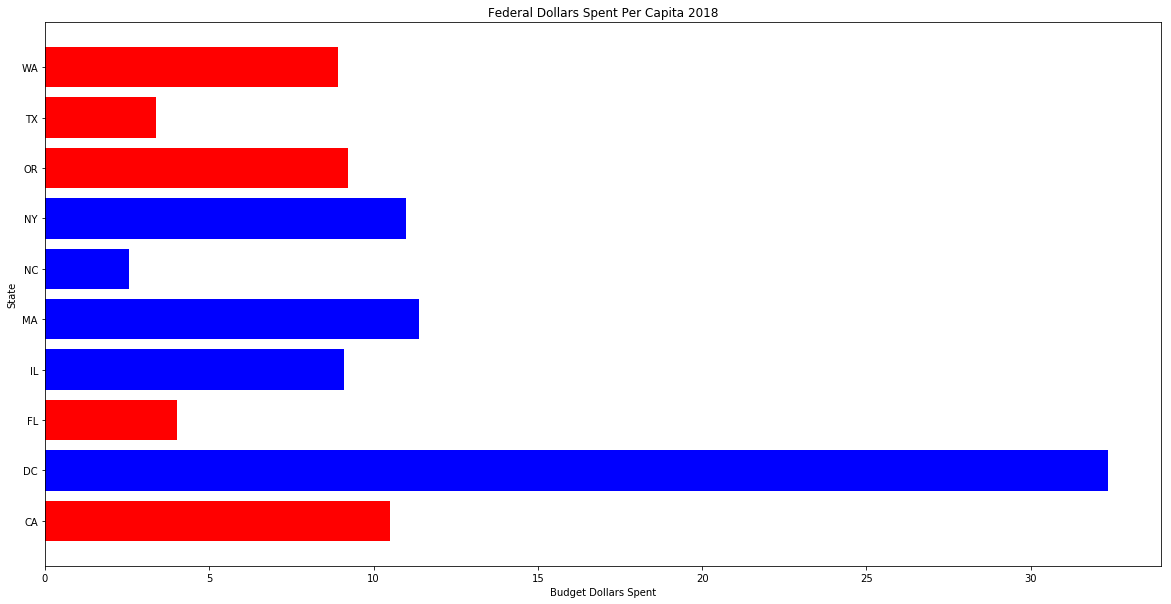

In [45]:
plt.barh(TB_States, per_cap,color=['red', 'blue', 'red', 'blue','blue','blue','blue','red','red','red'])
plt.xlabel("Budget Dollars Spent")
plt.ylabel("State")
plt.title("Federal Dollars Spent Per Capita 2018")
plt.savefig("Federal Dollars Spent Per Capita.png")
plt.show()